## TensorFlow Neural Network

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
import math
from utils import *
%matplotlib inline
np.random.seed(1)

### Import data

In [2]:
data = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
train_images = np.array([image.reshape(28, 28) for image in data.train.images])
train_labels = data.train.labels
test_images = np.array([image.reshape(28, 28) for image in data.validation.images])
test_labels = data.validation.labels

In [4]:
train_images.shape, len(train_labels), train_labels, test_images.shape, len(test_labels)

((55000, 28, 28),
 55000,
 array([4, 0, 7, ..., 3, 0, 5], dtype=uint8),
 (5000, 28, 28),
 5000)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

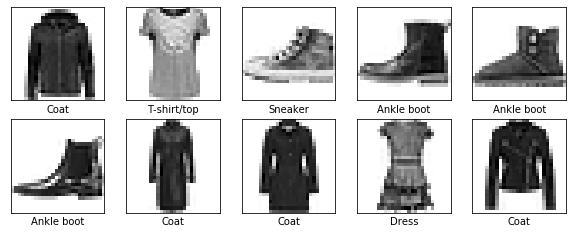

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# Flatten the training and test images
train_images_flatten = train_images.reshape(train_images.shape[0], -1).T
test_images_flatten = test_images.reshape(test_images.shape[0], -1).T
# Normalize image vectors
X_train = train_images_flatten/255.
X_test = test_images_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = np.eye(10)[train_labels.reshape(-1)].T
Y_test = np.eye(10)[test_labels.reshape(-1)].T

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 55000
number of test examples = 5000
X_train shape: (784, 55000)
Y_train shape: (10, 55000)
X_test shape: (784, 5000)
Y_test shape: (10, 5000)


The model is LINEAR -> RELU -> LINEAR -> SOFTMAX. 

### 2.1 - Create placeholders

Create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

In [8]:
def create_placeholders(n_x, n_y):

    X = tf.placeholder(tf.float32, [n_x, None], name = 'X')
    Y = tf.placeholder(tf.float32, [n_y, None], name = 'Y')
    
    return X, Y

In [9]:
X, Y = create_placeholders(784, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(784, ?), dtype=float32)
Y = Tensor("Y:0", shape=(10, ?), dtype=float32)


### 2.2 - Initializing the parameters
Use Xavier Initialization for weights and Zero Initialization for biases.



In [10]:
def initialize_parameters():
    
    tf.set_random_seed(1)       
        
    W1 = tf.get_variable("W1", [20,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [20,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W3", [10,20], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                 }
    
    return parameters

In [11]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(20, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(20, 1) dtype=float32_ref>
W2 = <tf.Variable 'W3:0' shape=(10, 20) dtype=float32_ref>
b2 = <tf.Variable 'b3:0' shape=(10, 1) dtype=float32_ref>


### 2.3 - Forward propagation in tensorflow 

Implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass.

In [12]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2

    
    return Z2

In [14]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z2 = forward_propagation(X, parameters)
    print("Z2 = " + str(Z2))

Z2 = Tensor("Add_1:0", shape=(10, ?), dtype=float32)


### 2.4 Compute cost

In [15]:
def compute_cost(Z2, Y):
    
    logits = tf.transpose(Z2)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

In [16]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z2 = forward_propagation(X, parameters)
    cost = compute_cost(Z2, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 - Backward propagation & parameter updates



The optimization fuction of cost can be done in one line: 
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```


### 2.6 - Building the model

In [17]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z2 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z2, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 120.695736
Cost after epoch 100: 27.347485
Cost after epoch 200: 24.060109
Cost after epoch 300: 22.558389
Cost after epoch 400: 21.635747


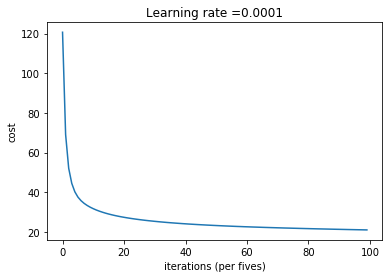

Parameters have been trained!
Train Accuracy: 0.863873
Test Accuracy: 0.8636


In [18]:
parameters = model(X_train, Y_train, X_test, Y_test)

-----
**Reference：**

[1] :[Coursera: Deep Learning Specilization](https://www.coursera.org/specializations/deep-learning)

[2] :[Tensorflow Tutorials](https://www.tensorflow.org/tutorials/keras/classification)

[3] :[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,2&seed=0.02209&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

